In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [27]:
df_test.isnull().any().sum()

3

In [3]:
# 1
df_train.info(), df_test.info()
#test has no survived as the predicted result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [6]:
#1
df_train.describe(),df_test.describe()

(       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
 count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
 std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
 min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
 25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
 50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
 75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
 max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200
 
 [8 rows x 7 columns],
        PassengerId      Pclass         Age       SibSp       Parch        Fare
 count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
 mean   1100.500000    2.265550   30.272590    0.4

In [7]:
#2
print('train dataset')
print(df_train.isnull().any())
print('-'*15)
print('test dataset')
print(df_test.isnull().any())
# Both train and test have lost values

train dataset
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
---------------
test dataset
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [8]:
#3
df_combined=df_train.append(df_test)
df_combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
df_combined=df_combined.sort_values(by='Fare',ascending=False)
df_combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
372,1264,NaN,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
266,1158,NaN,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


33.2954792813457
51.75866823917416


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


33.27004346829654
51.74706272942533


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


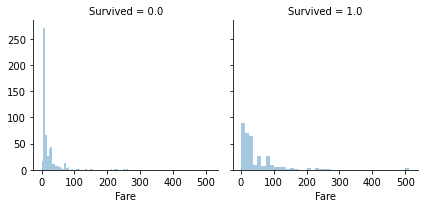

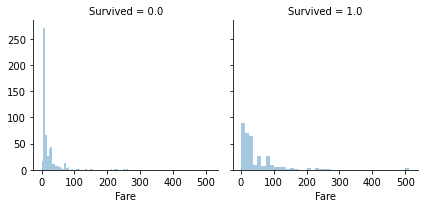

In [24]:
print(df_combined['Fare'].mean())
print(df_combined['Fare'].std())

g=sns.FacetGrid(df_combined,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

df_combined['Fare']=df_combined['Fare'].fillna(method='ffill')
print(df_combined['Fare'].mean())
print(df_combined['Fare'].std())
df_combined[df_combined['Fare'].isnull().values==True]

#補平均數，平均數上沒有差異性，標準差接近
g = sns.FacetGrid(df_combined, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

33.2954792813457
51.75866823917416


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


33.2954792813457
51.75866823917416


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


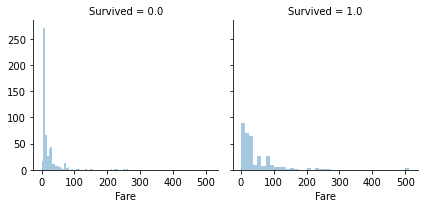

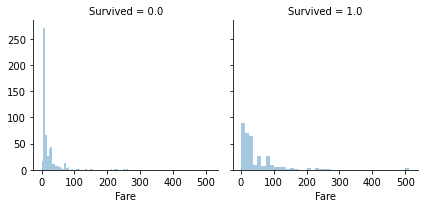

In [25]:
df_combined=df_train.append(df_test)
df_combined=df_combined.sort_values(by='Fare',ascending=False)

print(df_combined['Fare'].mean())
print(df_combined['Fare'].std())

g=sns.FacetGrid(df_combined,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

df_combined['Fare']=df_combined['Fare'].fillna(method='bfill')
print(df_combined['Fare'].mean())
print(df_combined['Fare'].std())
df_combined[df_combined['Fare'].isnull().values==True]

#補平均數，平均數上沒有差異性，標準差接近
g = sns.FacetGrid(df_combined, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

33.2954792813457
51.75866823917416


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


33.2954792813457
51.7388790324714


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


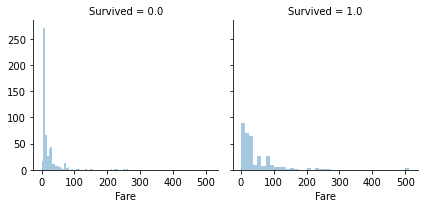

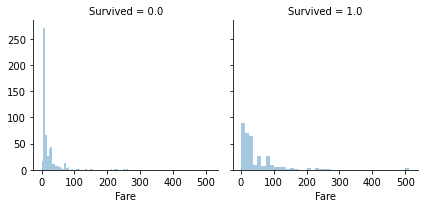

In [26]:
df_combined=df_train.append(df_test)
df_combined=df_combined.sort_values(by='Fare',ascending=False)

print(df_combined['Fare'].mean())
print(df_combined['Fare'].std())

g=sns.FacetGrid(df_combined,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

df_combined['Fare']=df_combined['Fare'].fillna(df_combined['Fare'].mean())
print(df_combined['Fare'].mean())
print(df_combined['Fare'].std())
df_combined[df_combined['Fare'].isnull().values==True]

#補平均數，平均數上沒有差異性，標準差接近
g = sns.FacetGrid(df_combined, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

In [ ]:
# Three null values appear among 1309 samples.
# Therefore, whichever fillna method we adopt would not affect the overall measurement.
# In conclusion, survival rate goes down as fare goes up.  